In [2]:
import matplotlib.pyplot as plt
import numpy as np
def convert_to_signed_16bit(value):
    if value >= 32768:
        return value - 65536
    else:
        return value
# Text dosyasından veriyi okuma ve işleme fonksiyonu
def read_and_process_data(file_path):
    timestamps = []
    ax_values = []
    ay_values = []
    az_values = []
    gx_values = []
    gy_values = []
    gz_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            timestamps.append(int(values[0]))
            ax_values.append(convert_to_signed_16bit(int(values[2]) )/ 16384.0)
            ay_values.append(convert_to_signed_16bit(int(values[4]) )/ 16384.0)
            az_values.append(convert_to_signed_16bit(int(values[6]) )/ 16384.0)
            gx_values.append(convert_to_signed_16bit(int(values[8]) )/ 131.0)
            gy_values.append(convert_to_signed_16bit(int(values[10]) )/ 131.0)
            gz_values.append(convert_to_signed_16bit(int(values[12]) )/ 131.0)
    timestamps = timestamps- timestamps[0] * np.ones(len(timestamps))
    return timestamps, ax_values, ay_values, az_values, gx_values, gy_values, gz_values


In [ ]:
file_path = 'esra_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'esra_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.xlim([0, 5000])
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.xlim([0, 5000])
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()



In [ ]:
#plot the data gx,gy and gz
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()


In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Esra yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Esra koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()



In [ ]:
#plot the data gx,gy and gz
%matplotlib widget
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Esra yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Esra koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AX[int(N/2)] = 0
plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX)**2, label='AX(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AY[int(N/2)] = 0

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY)**2, label='AY(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AZ[int(N/2)] = 0

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ)**2, label='AZ(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AV[int(N/2)] = 0

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV)**2, label='AV(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV(w)|^2")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AX1[int(N/2)] = 0

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1)**2, label='AX1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AY1[int(N/2)] = 0

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1)**2, label='AY1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AZ1[int(N/2)] = 0

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1)**2, label='AZ1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AV1[int(N/2)] = 0

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1)**2, label='AV1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV1(w)|^2")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [42]:
#write a function to detect the activity of the person according to the energy of ax signal in frequency domain
from scipy.io import loadmat  
import scipy.signal as sgnl  
import numpy as np
def detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf, plotConf = False, name =""):
    ax_lowpass = sgnl.lfilter(b_lpf, a_lpf, ax)
    N_ax_lowpass= len(ax_lowpass)
    w= np.arange(-np.pi, np.pi , 2*np.pi/N_ax_lowpass) # omega ekseninin pi ile +pi arasında tanımlanması
    AX_lowpass = np.fft.fftshift(np.fft.fft(ax_lowpass, N_ax_lowpass)/N_ax_lowpass)
    
    ax_bandpass = sgnl.lfilter(b_bpf, a_bpf, ax)
    N_ax_bandpass = len(ax_bandpass)
    w= np.arange(-np.pi, np.pi , 2*np.pi/N_ax_bandpass) # omega ekseninin pi ile +pi arasında tanımlanması
    AX_bandpass = np.fft.fftshift(np.fft.fft(ax_bandpass, N_ax_bandpass)/N_ax_bandpass)
    
    #AX_lowpass_dc_component = abs(AX_lowpass[len(AX_lowpass)//2])
    #AX_dc_component = abs(AX[len(AX)//2])
    #remove low pass dc component
    AX_lowpass[len(AX_lowpass)//2] = 0
    if plotConf:
        wn, Hw = sgnl.freqz(b_lpf,a_lpf)  
        Hw_mag = abs(Hw)  
        Hw_phs = np.unwrap(np.angle(Hw)) 
        #plot the magnitude response
        plt.figure(figsize=(8,5))
        plt.subplot(3,2,1)
        plt.plot(wn/np.pi, Hw_mag)
        plt.title('Magnitude response LPF'+" "+str(name))
        plt.xlabel('Normalized frequency')
        plt.ylabel('Magnitude')
        plt.grid()
        #plot the phase response
        plt.subplot(3,2,3)
        plt.plot(wn/np.pi, Hw_phs)
        plt.title('Phase response LPF')
        plt.xlabel('Normalized frequency'+" "+str(name))
        plt.ylabel('Phase')
        plt.grid()
        plt.tight_layout()
        #plot group delay
        plt.subplot(3,2,5)
        N = 2*len(Hw_phs)
        tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))  
        plt.ylim([198,200])
        plt.plot(wn[1::]/np.pi, tau_w)  
        plt.title('Group delay LPF')
        plt.xlabel('Normalized frequency'+" "+str(name))
        plt.ylabel('Group delay')
        plt.grid()

        wn, Hw = sgnl.freqz(b_bpf,a_bpf)  
        Hw_mag = abs(Hw)  
        Hw_phs = np.unwrap(np.angle(Hw)) 
        plt.subplot(3,2,2)
        plt.plot(wn/np.pi, Hw_mag)
        plt.title('Magnitude response BPF'+" "+str(name))
        plt.xlabel('Normalized frequency')
        plt.ylabel('Magnitude')
        plt.grid()
        #plot the phase response
        plt.subplot(3,2,4)
        plt.plot(wn/np.pi, Hw_phs)
        plt.title('Phase response BPF'+" "+str(name))
        plt.xlabel('Normalized frequency')
        plt.ylabel('Phase')
        plt.grid()
        plt.tight_layout()
        #plot group delay
        plt.subplot(3,2,6)
        N = 2*len(Hw_phs)
        tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))  
        plt.ylim([198,200])
        plt.plot(wn[1::]/np.pi, tau_w)  
        plt.title('Group delay BPF'+" "+str(name))
        plt.xlabel('Normalized frequency')
        plt.ylabel('Group delay')
        plt.grid()
        
        
        
        plt.figure(figsize = (8,5))
        plt.subplot(2,1,1)
        markerline_ax_lowpass, stemlines_ax_lowpass, baseline_ax_lowpass = plt.stem(w/np.pi, abs(AX_lowpass), label='AX_lowpass(w)')
        plt.xlim([-0.25,0.25])
        plt.title("|AX_lowpass(w)| without dc component"+" "+str(name))
        plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
        plt.ylabel("$AX_lowpass(\omega)$")
        plt.grid()

        plt.subplot(2,1,2)
        markerline_ax_bandpass, stemlines_ax_bandpass, baseline_ax_bandpass = plt.stem(w/np.pi, abs(AX_bandpass), label='AX_bandpass(w)')
        plt.xlim([-0.25,0.25])
        plt.title("|AX_bandpass(w)|"+" "+str(name))
        plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
        plt.ylabel("$AX_bandpass(\omega)$")
        plt.grid()
        plt.tight_layout()

        # Add mplcursors to enable point selection
        mplcursors.cursor([markerline_ax_lowpass, markerline_ax_bandpass], hover=True)

        plt.show()
    
    energy_ax_lowpass = np.sum(abs(AX_lowpass)**2) 
    energy_ax_bandpass = np.sum(abs(AX_bandpass)**2)
    
    if energy_ax_lowpass > energy_ax_bandpass:
        return "The person walking", energy_ax_lowpass, energy_ax_bandpass
    else:
        return "The person running", energy_ax_lowpass, energy_ax_bandpass
    

In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True,name = "ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass,"ax")
ax1_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True, name = "ax1")
print("ax1_activity: ", ax1_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

## fuad tan toplanan veriler

In [ ]:
name = "fuad"
file_path = 'fuad_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'fuad_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name +" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name +" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name +" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name +" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

## güneyden alınan veriler

In [ ]:
name = "guney"
file_path = 'guney_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'guney_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name+" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name+" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name+" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name+" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True,name = "ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass,"ax")
ax1_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True, name = "ax1")
print("ax1_activity: ", ax1_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

## Erhandan toplanan veriler

In [ ]:
name = "erhan"
file_path = 'erhan_elektronikte_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'erhan_elektronikte_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name+" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name+" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name+" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name+" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name = "ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass,"ax")
ax1_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False, name = "ax1")
print("ax1_activity: ", ax1_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

## Beyzadan alınan veriler

In [ ]:
name = "beyza"
file_path = 'beyza_elektronikte_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'beyza_elektronikte_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name+" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name+" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name+" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name+" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

## Büşradan toplanılan veriler

In [ ]:
name = "büşra"
file_path = 'büşra_elektronikte_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'büşra_elektronikte_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [ ]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name+" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name+" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name+" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name+" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [ ]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

In [ ]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

# Merdiven çıkma verisi

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def convert_to_signed_16bit(value):
    if value >= 32768:
        return value - 65536
    else:
        return value
# Text dosyasından veriyi okuma ve işleme fonksiyonu
def read_and_process_data(file_path):
    timestamps = []
    ax_values = []
    ay_values = []
    az_values = []
    gx_values = []
    gy_values = []
    gz_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            timestamps.append(int(values[0]))
            ax_values.append(convert_to_signed_16bit(int(values[2]) )/ 16384.0)
            ay_values.append(convert_to_signed_16bit(int(values[4]) )/ 16384.0)
            az_values.append(convert_to_signed_16bit(int(values[6]) )/ 16384.0)
            gx_values.append(convert_to_signed_16bit(int(values[8]) )/ 131.0)
            gy_values.append(convert_to_signed_16bit(int(values[10]) )/ 131.0)
            gz_values.append(convert_to_signed_16bit(int(values[12]) )/ 131.0)
    timestamps = timestamps- timestamps[0] * np.ones(len(timestamps))
    return timestamps, ax_values, ay_values, az_values, gx_values, gy_values, gz_values


In [ ]:
file_path = 'fuad_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'fuad_merdiven_cıkıyor1.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)


#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Fuad yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Fuad merdiven çıkıyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Fuad yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Fuad merdiven çıkıyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.1,0.1])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.1,0.1])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.1,0.1])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.1,0.1])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.1,0.1])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.1,0.1])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.1,0.1])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.1,0.1])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()



In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()



### esra merdiven çıkıyor

In [ ]:
file_path = 'esra_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'esra_merdiven_cıkıyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)


#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Esra yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Esra merdiven çıkıyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Esra yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Esra merdiven çıkıyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()



In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AX[int(N/2)] = 0
plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX)**2, label='AX(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AY[int(N/2)] = 0

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY)**2, label='AY(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AZ[int(N/2)] = 0

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ)**2, label='AZ(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AV[int(N/2)] = 0

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV)**2, label='AV(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV(w)|^2")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AX1[int(N/2)] = 0

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1)**2, label='AX1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AX1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AY1[int(N/2)] = 0

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1)**2, label='AY1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AY1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AZ1[int(N/2)] = 0

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1)**2, label='AZ1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AZ1(w)|^2") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
#remove the DC component
AV1[int(N/2)] = 0

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1)**2, label='AV1(w)')
plt.xlim([-0.2,0.2])
plt.title("|AV1(w)|^2")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()



In [ ]:


import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()



In [ ]:
from scipy.io import loadmat  
import scipy.signal as sgnl  
import numpy as np

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  

first_activity = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf)[0]


filter_data = loadmat('hamming_lpf_fc_0_005_N_1000.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf_merdiven = Coeffs[:,0] # first column is b  
a_lpf_merdiven = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_010_N_1000.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf_merdiven = Coeffs[:,0] # first column is b  
a_bpf_merdiven= 1 # second column is a (only if the filter is IIR)  

print(detect_activity_merdiven(ax, b_lpf_merdiven, a_lpf_merdiven, b_bpf_merdiven, a_bpf_merdiven, first_activity))




## Merdiven çıkma ayakla

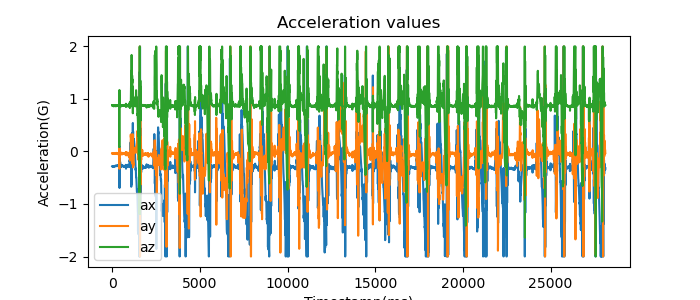

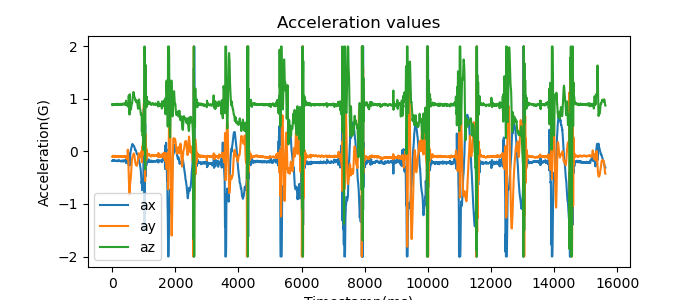

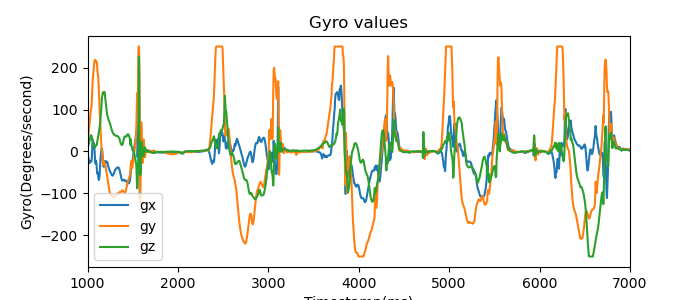

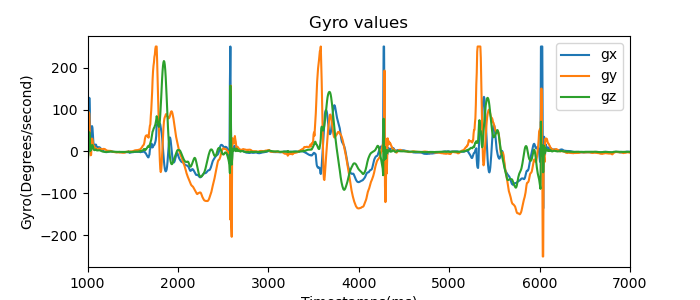

In [3]:
name = "fuad"
file_path = 'annem_yuruyor_ayak1.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'fuad_merdiven_cıkıyor_ayak1.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)
figuresize = (7, 3)
#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=figuresize)
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=figuresize)
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=figuresize)
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=figuresize)
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



In [30]:
print(len(ax), len(ay), len(az), len(gx), len(gy), len(gz))
print(len(ax1), len(ay1), len(az1), len(gx1), len(gy1), len(gz1))

20285 20285 20285 20285 20285 20285
3126 3126 3126 3126 3126 3126


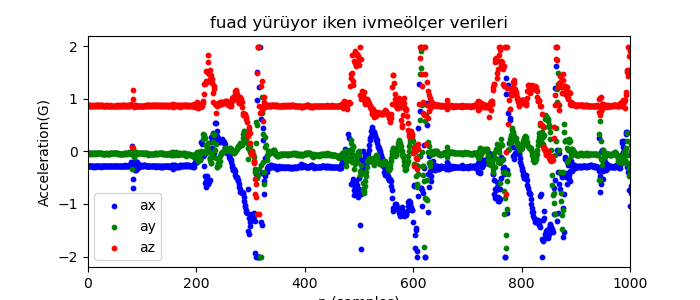

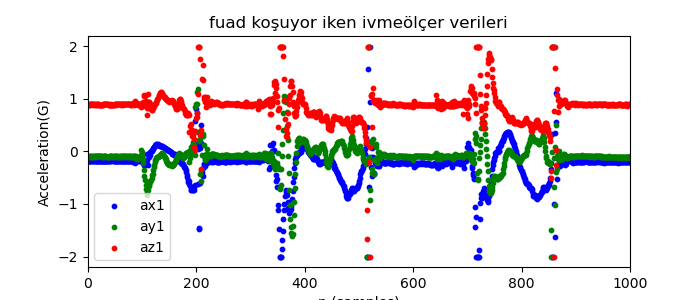

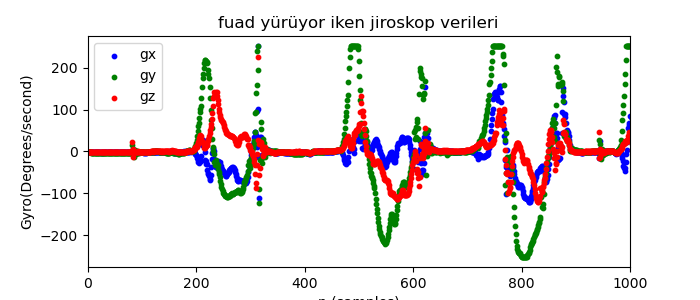

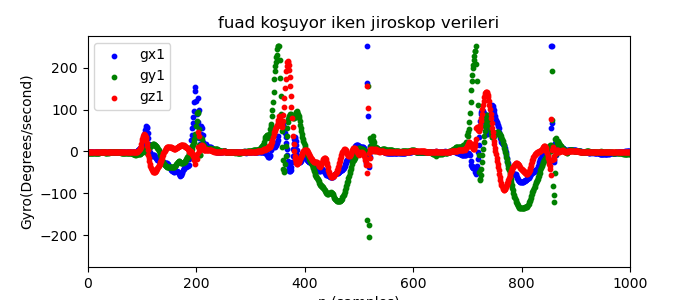

In [4]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=figuresize)
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title(name+" yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=figuresize)
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title(name+" koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=figuresize)
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title(name+" yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=figuresize)
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title(name+" koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


In [5]:
print(len(ax), len(ay), len(az), len(gx), len(gy), len(gz))
print(len(ax1), len(ay1), len(az1), len(gx1), len(gy1), len(gz1))
N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
print(len(w))

5626 5626 5626 5626 5626 5626
3126 3126 3126 3126 3126 3126
3126


3126


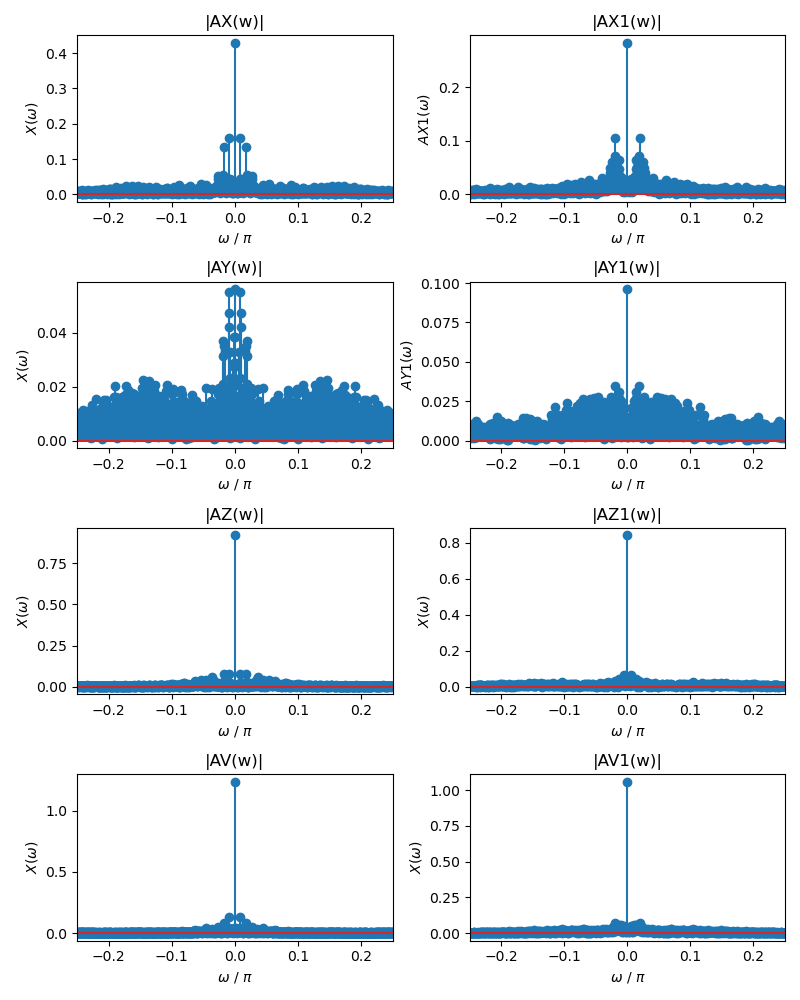

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)
plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
print(len(AX1))

markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


In [7]:
import scipy.signal as sgnl
from scipy.io import loadmat

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True,name = "ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass,"ax")
ax1_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = True, name = "ax1")
print("ax1_activity: ", ax1_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)

NameError: name 'detect_activity' is not defined

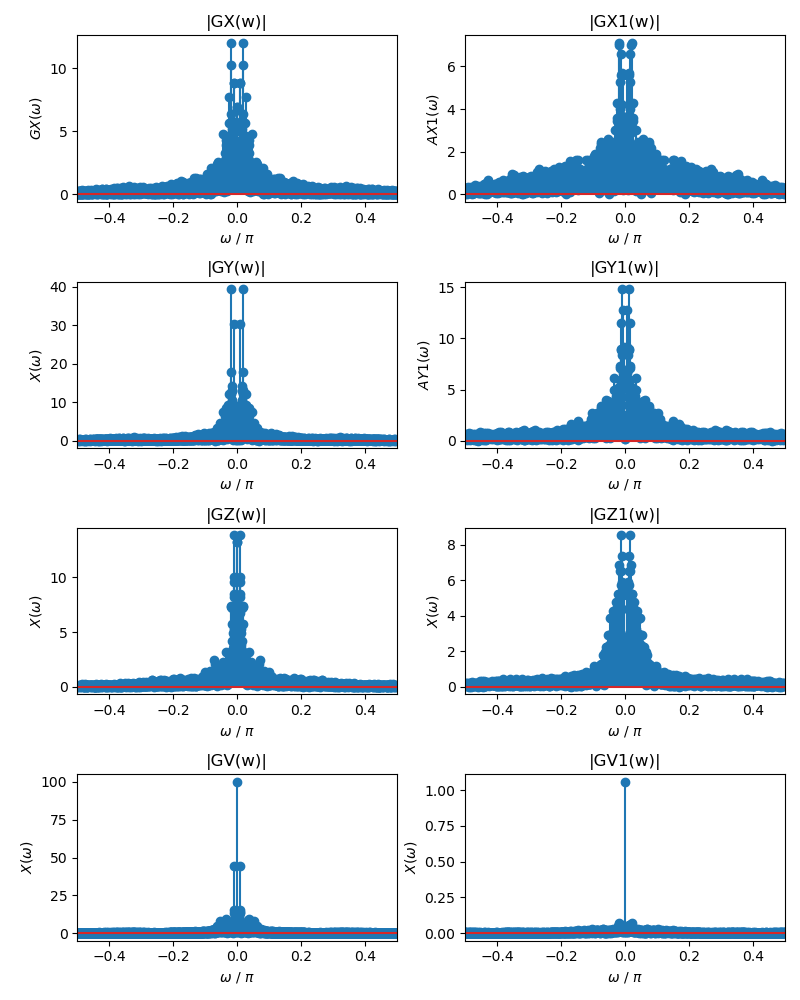

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(gx)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX = np.fft.fftshift(np.fft.fft(gx, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (8,10))
plt.subplot(4,2,1)
markerline_gx, stemlines_gx, baseline_gx = plt.stem(w/np.pi, abs(GX), label='GX(w)')
plt.xlim([-0.5,0.5])
plt.title("|GX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$GX(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY = np.fft.fftshift(np.fft.fft(gy, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_gy, stemlines_gy, baseline_gy = plt.stem(w/np.pi, abs(GY), label='GY(w)')
plt.xlim([-0.5,0.5])
plt.title("|GY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ = np.fft.fftshift(np.fft.fft(gz, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_gz, stemlines_gz, baseline_gz = plt.stem(w/np.pi, abs(GZ), label='GZ(w)')
plt.xlim([-0.5,0.5])
plt.title("|GZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector = np.sqrt(np.array(gx)**2 + np.array(gy)**2 + np.array(gz)**2)
N = len(gvector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV = np.fft.fftshift(np.fft.fft(gvector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_gv, stemlines_gv, baseline_gv = plt.stem(w/np.pi, abs(GV), label='GV(w)')
plt.xlim([-0.5,0.5])
plt.title("|GV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gx1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GX1 = np.fft.fftshift(np.fft.fft(gx1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_gx1, stemlines_gx1, baseline_gx1 = plt.stem(w/np.pi, abs(GX1), label='GX1(w)')
plt.xlim([-0.5,0.5])
plt.title("|GX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gy1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GY1 = np.fft.fftshift(np.fft.fft(gy1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_gy1, stemlines_gy1, baseline_gy1 = plt.stem(w/np.pi, abs(GY1), label='GY1(w)')
plt.xlim([-0.5,0.5])
plt.title("|GY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(gz1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GZ1 = np.fft.fftshift(np.fft.fft(gz1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_gz1, stemlines_gz1, baseline_gz1 = plt.stem(w/np.pi, abs(GZ1), label='GZ1(w)')
plt.xlim([-0.5,0.5])
plt.title("|GZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

gvector1 = np.sqrt(np.array(gx1)**2 + np.array(gy1)**2 + np.array(gz1)**2)
N = len(gvector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
GV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_gv1, stemlines_gv1, baseline_gv1 = plt.stem(w/np.pi, abs(GV1), label='GV1(w)')
plt.xlim([-0.5,0.5])
plt.title("|GV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_gx, markerline_gy, markerline_gz, markerline_gv, markerline_gx1, markerline_gy1, markerline_gz1, markerline_gv1], hover=True)

plt.show()


In [43]:

filter_data = loadmat('hamming_lpf_fc_0_012_N_400.mat') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_lpf = Coeffs[:,0] # first column is b  
a_lpf = 1 # second column is a (only if the filter is IIR)  

filter_data = loadmat('hamming_bpf_fc_0_005_fc2_0_016_N_400') # load the filter obtained from  pyfda  
Coeffs = filter_data['ba'].astype(float) # get the coefficients and  <convert them to float (from string)  
#print(Coeffs)
b_bpf = Coeffs[:,0] # first column is b  
a_bpf= 1 # second column is a (only if the filter is IIR)  
ax_activity,energy_ax_lowpass,energy_ax_bandpass = detect_activity(ax, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax")
print("ax_activity: ", ax_activity, "energy_ax_lowpass: ", energy_ax_lowpass, "energy_ax_bandpass: ", energy_ax_bandpass)
ax1_activity,energy_ax1_lowpass,energy_ax1_bandpass = detect_activity(ax1, b_lpf, a_lpf, b_bpf, a_bpf , plotConf = False,name="ax1")
print("ax1_activity: ", ax1_activity, "energy_ax1_lowpass: ", energy_ax1_lowpass, "energy_ax1_bandpass: ", energy_ax1_bandpass)

ax_activity:  The person walking energy_ax_lowpass:  0.018127663108720937 energy_ax_bandpass:  0.004569152308253522
ax1_activity:  The person running energy_ax1_lowpass:  0.01914213478719138 energy_ax1_bandpass:  0.11113339036318923


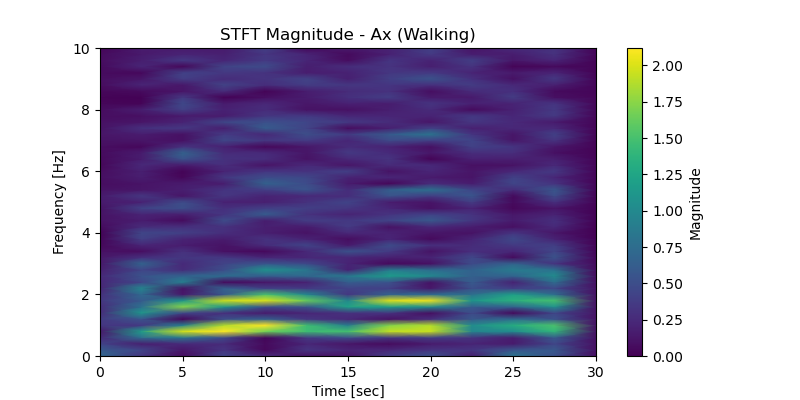

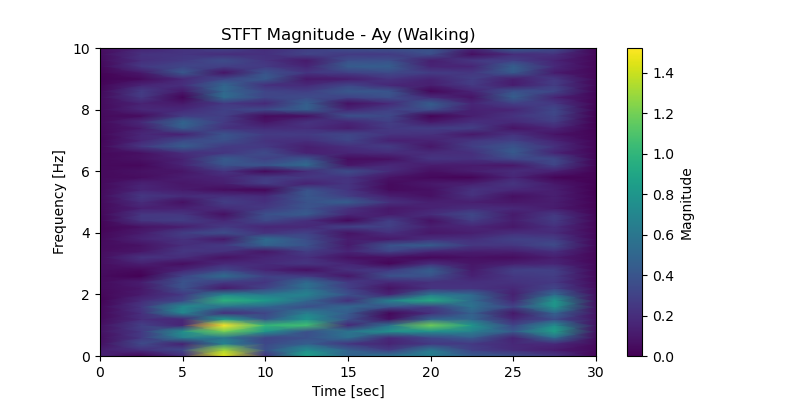

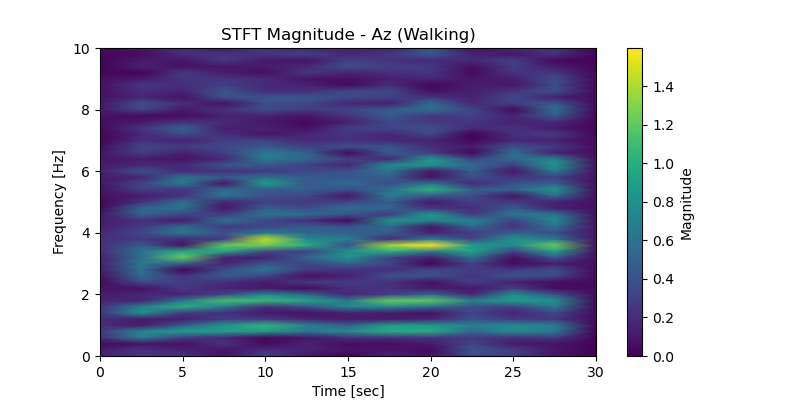

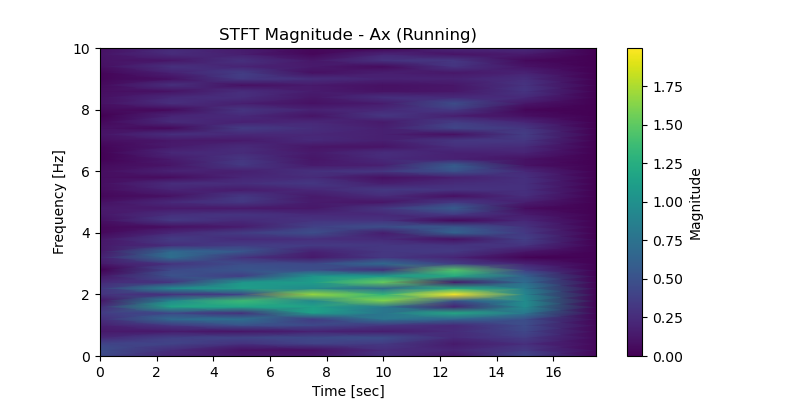

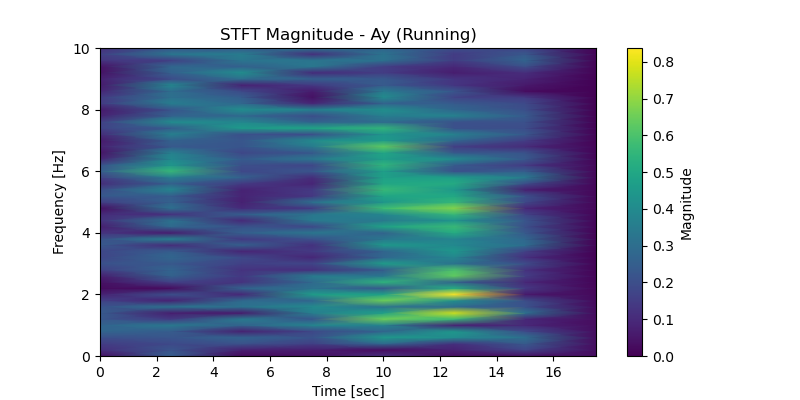

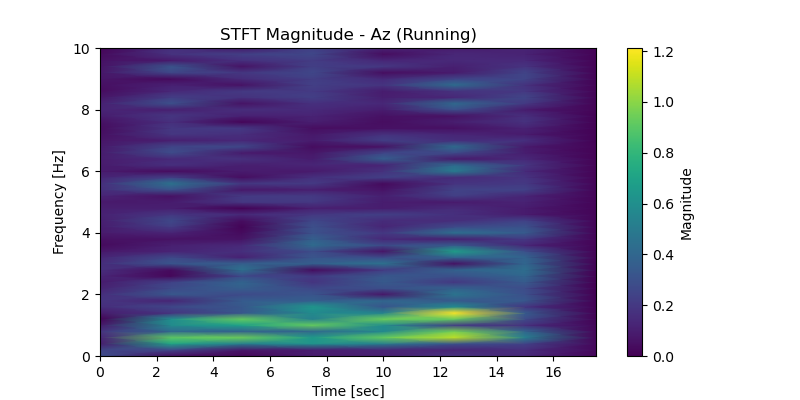

In [10]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft((np.array(ax) - np.mean(ax))*9.8, fs, 'Ax (Walking)')
plot_stft((np.array(ay) - np.mean(ay))*9.8, fs, 'Ay (Walking)')
plot_stft((np.array(az) - np.mean(az))*9.8, fs, 'Az (Walking)')

plot_stft((np.array(ax1) - np.mean(ax1))*9.8, fs, 'Ax (Running)')
plot_stft((np.array(ay1) - np.mean(ay1))*9.8, fs, 'Ay (Running)')
plot_stft((np.array(az1) - np.mean(az1))*9.8, fs, 'Az (Running)')

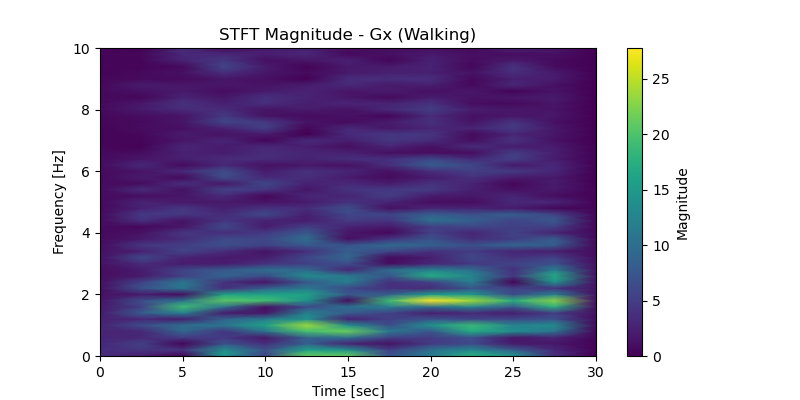

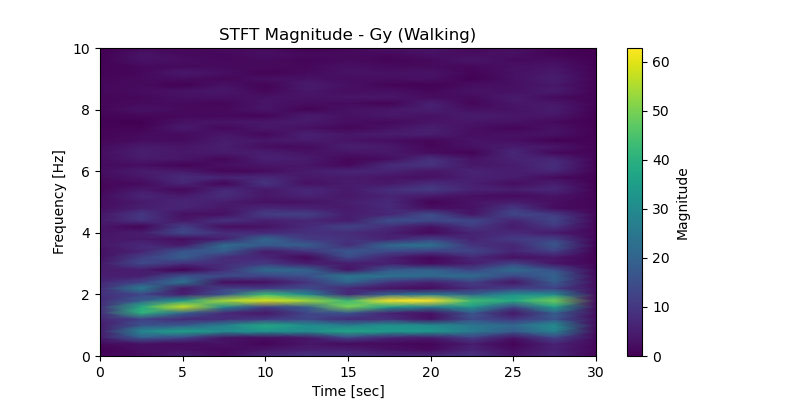

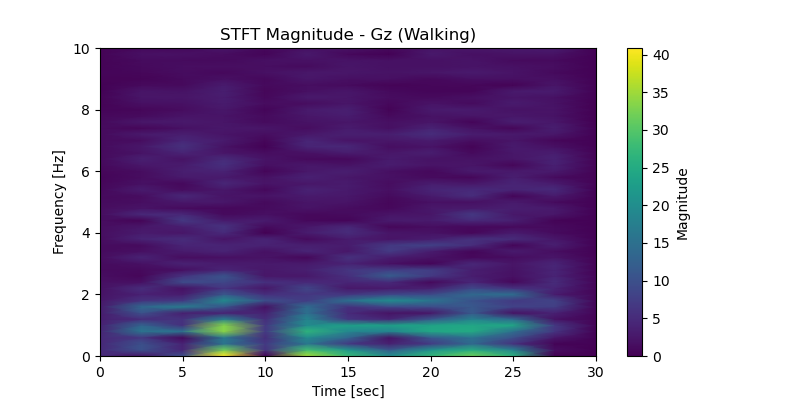

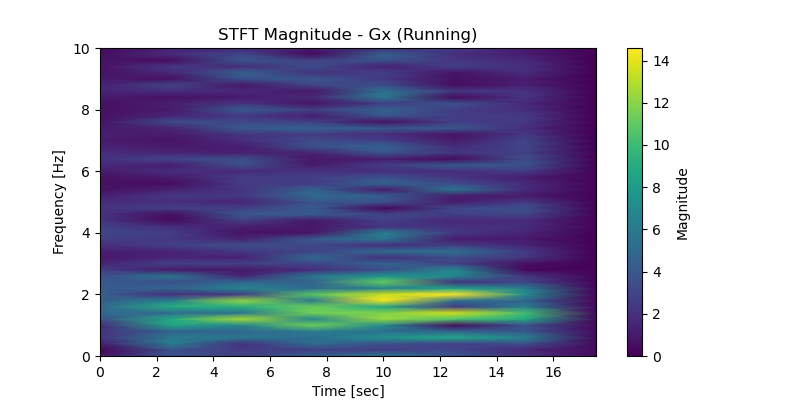

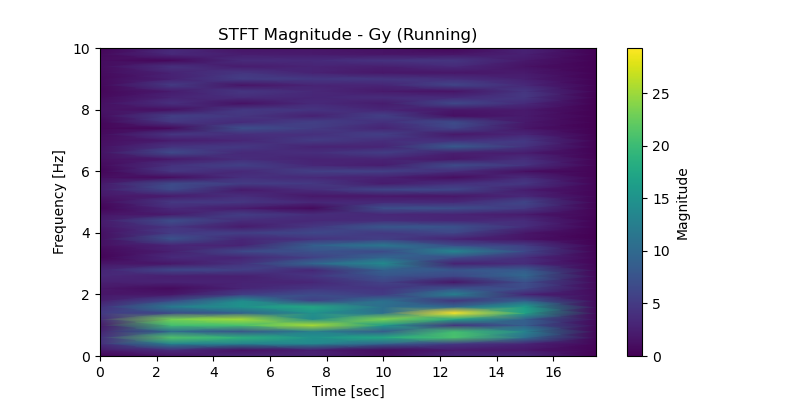

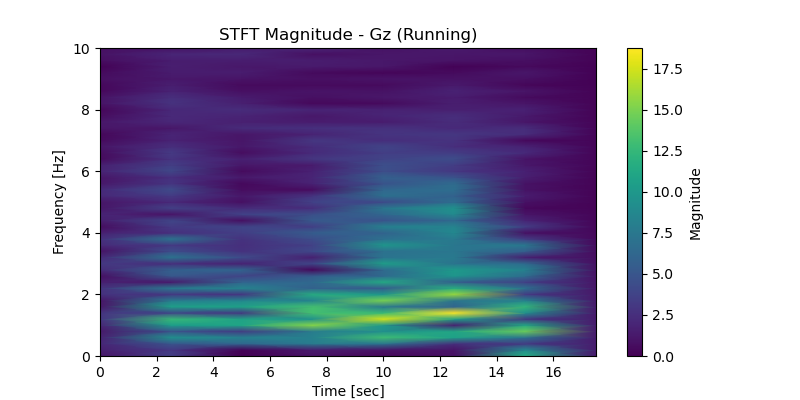

In [12]:
# STFT hesaplama ve plot fonksiyonu
from scipy.signal import stft
def plot_stft(data, fs, title):
    f, t, Zxx = stft(data, fs=fs, nperseg=1000, window = 'hamming')
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    plt.ylim([0, 10])  # 0-1 Hz arasında gösterim
    plt.title(f'STFT Magnitude - {title}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')
    plt.show()

# Örnekleme frekansı (Hz)
fs = 200  # Bu değeri verinizin gerçek örnekleme frekansına göre ayarlayın

# STFT plotları
plot_stft(gx, fs, 'Gx (Walking)')
plot_stft(gy, fs, 'Gy (Walking)')
plot_stft(gz, fs, 'Gz (Walking)')

plot_stft(gx1, fs, 'Gx (Running)')
plot_stft(gy1, fs, 'Gy (Running)')
plot_stft(gz1, fs, 'Gz (Running)')